In [69]:
import numpy as np
import matplotlib.pyplot as plt


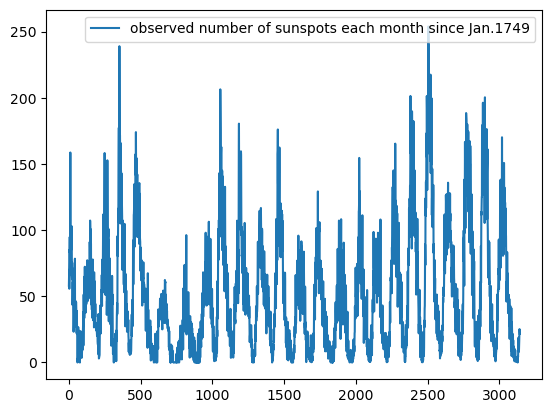

In [70]:
data = np.loadtxt('sunspots.txt')
num_months = data.T[0]
sunspot_data = data.T[1]

plt.figure()
plt.plot(num_months,sunspot_data,label="observed number of sunspots each month since Jan.1749")
plt.legend()
plt.show()

In [71]:
fft_coeffs = np.fft.fft(sunspot_data)
frequencies = np.fft.fftfreq(len(sunspot_data), d=1) 


# 计算功率谱
power_spectrum = np.abs(fft_coeffs) ** 2

# 找到峰值（去除零频率分量）
nonzero_freqs = frequencies[frequencies > 0]
nonzero_power = power_spectrum[frequencies > 0]
peak_index = np.argmax(nonzero_power)
peak_frequency = nonzero_freqs[peak_index]

# 计算对应的周期（周期 = 1/频率）
period_in_months = 1 / peak_frequency

# 输出结果
print(f"峰值频率为：{peak_frequency}")
print(f"峰值频率对应的周期（以月为单位）：{period_in_months} 个月")


峰值频率为：0.007636016544702513
峰值频率对应的周期（以月为单位）：130.95833333333334 个月


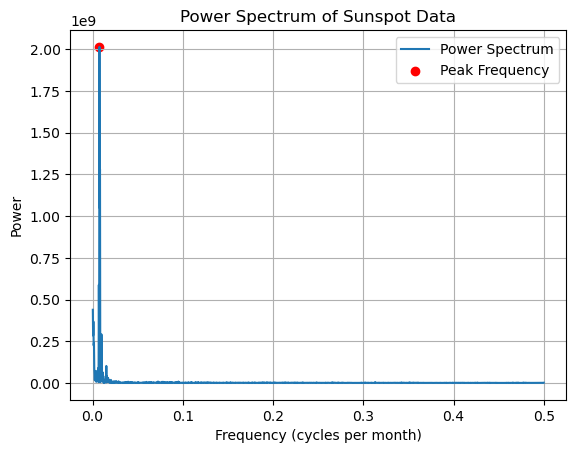

In [72]:
plt.figure()
plt.plot(nonzero_freqs, nonzero_power, label="Power Spectrum")
plt.scatter([peak_frequency], [nonzero_power[peak_index]], color='red', label='Peak Frequency')
plt.xlabel("Frequency (cycles per month)")
plt.ylabel("Power")
plt.title("Power Spectrum of Sunspot Data")
plt.legend()
plt.grid()
plt.show()